## Exploring read depth

**20170403**

I'd like to write a script that produces plots of read depth, in multiple ways (e.g., within and across individuals), but I realize that there were a couple of bugs in my previous notebook about this. So, trying to rewrite and debug here.

In [1]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder

/mnt/hgfs/SHARED_FOLDER/WorkingFolder


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
# get file names from matches list text file
file_of_filenames = open("Stacks_2/list_matches_filenames.txt","r") # change to args.matchfiles
lines = file_of_filenames.readlines()
filename_list = []
for line in lines:
    filename = line.strip()
    filename_list.append(filename)
num_files = len(filename_list) # get num files

In [4]:
# initiate dictionary to store tag read depth information across individuals
tag_rd_cum_dict = {}

# initiate dictionary to store tag read depths, to quantify variance across individuals
tag_rd_for_vars = {}

# initiate list to store tag read depth within individuals
within_inds_tag_rd = []

In [5]:
# get within individual count data by building a temporary dictionary and merging lists

within_ints_rag_rd = []
for file in filename_list:
    indfile = open("Stacks_2" + "/" + file,"r") # change to args.
    lines = indfile.readlines()[1:]
    within_dict = {}
    for line in lines:
        linelist = line.strip().split()
        locus = int(linelist[2])
        count = int(linelist[6])
        if locus not in  within_dict:
            within_dict[locus] = int(count)
        elif locus in within_dict:
            oldcount =  within_dict[locus]
            newcount = oldcount + count
            within_dict[locus] = newcount     
        else:
            print "Something funky is going on."
        counts = within_dict.values()
        length = len(counts)
        sample = list(np.random.choice(counts, size=(length/100),replace=False))
        within_ints_rag_rd += sample
    indfile.close()



In [6]:
print within_ints_rag_rd[0:19]

[65, 95, 218, 135, 218, 117, 46, 63, 234, 512, 215, 41, 205, 138, 188, 205, 205, 68, 99]


In [12]:
# get tag read depths up to 99th percentile, to exclude most of tail that makes the plot unreadable
p = np.percentile(within_ints_rag_rd,99)
within_ints_rag_rd_99 = []
for rd in within_ints_rag_rd:
    if rd < p:
        within_ints_rag_rd_99.append(rd)
print within_ints_rag_rd_99[0:9]

[65, 95, 218, 135, 218, 117, 46, 63, 234]


In [13]:
print p

571.0


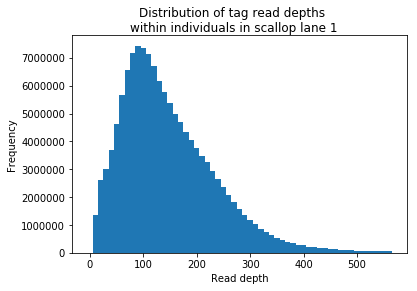

In [14]:
# plot histogram of within individual tag read depths, using 99 percentile
plt.hist(within_ints_rag_rd_99, bins = np.arange(0,max(within_ints_rag_rd_99)+1,10)-5)
plt.xlabel("Read depth")
plt.ylabel("Frequency")
plt.suptitle("Distribution of tag read depths \nwithin individuals in scallop lane 1")
plt.show()

In [ ]:

# add zeros where matches files had no line for a given locus
vars_list = []
for key in tag_rd_for_vars:
    if len(tag_rd_for_vars[key]) != num_files:
        print "Length of list for this key: " + str(len(tag_rd_for_vars[key]))
        diff = num_files - len(tag_rd_for_vars[key])
        print "Diff with 71 : " + str(diff)
        zerolist = [0]*diff
        oldlist = tag_rd_for_vars[key]
        newlist = oldlist + zerolist
        print "length of new list: " + str(len(newlist))
        tag_rd_for_vars[key] = newlist
        tag_var = np.var(newlist)
        vars_list.append(tag_var)

In [ ]:
print vars_list[0:9]

In [ ]:
# get tag read depths up to 99th percentile, to exclude most of tail that makes the plot unreadable
p = np.percentile(within_inds_tag_rd,99)
within_inds_tag_rd_99 = []
for rd in within_inds_tag_rd:
    if rd < p:
        within_inds_tag_rd_99.append(rd)

In [ ]:
# get vars list, up to 99 percentile
q = np.percentile(vars_list,99)
vars_list_99 = []
for var in vars_list:
    if var < q:
        vars_list_99.append(var)
print vars_list_99[0:19]
print max(vars_list_99)


In [ ]:
# plot histogram of variance in read depth at tags across individuals
plt.hist(vars_list_99, bins = np.arange(0,max(vars_list_99)+1,20)-10)
plt.xlabel("Variance of tag read depths across individuals")
plt.ylabel("Frequency")
plt.suptitle("Distribution of tag read depth variance \nacross individuals in " + "scallop lane 1")
plt.show()



In [ ]:
vars_list_99[0:19]

In [ ]:
# plot histogram of variance in read depth at tags across individuals
plt.hist(vars_list_99, bins = np.arange(0,max(vars_list_99)+1,20)-10)
plt.xlabel("Variance of tag read depths across individuals")
plt.ylabel("Frequency")
plt.suptitle("Distribution of tag read depth variance \nacross individuals in " + "scallop lane 1")
plt.show()
# savefig(args.varsacrosstagrd_FN)

In [ ]:
### Tag read depth within individuals

# get tag read depths up to 99th percentile, to exclude most of tail that makes the plot unreadable
p = np.percentile(within_inds_tag_rd,99)
within_inds_tag_rd_99 = []
for rd in within_inds_tag_rd:
    if rd < p:
        within_inds_tag_rd_99.append(rd)

# # plot boxplot of tag read depth within individuals
# plt.boxplot(within_inds_tag_rd_99)
# plt.ylabel("Number of reads")
# plt.xticks([1],[args.dataname])
# plt.suptitle("Tag read depths within individuals, 99 percentile")
# savefig(args.ind_tag_rd_fn)

# # plot histogram of within individual tag read depths, using 99 percentile
# plt.hist(within_inds_tag_rd_99, bins = np.arange(0,max(within_inds_tag_rd_99)+1,10)-5)
# plt.xlabel("Read depth")
# plt.ylabel("Frequency")
# plt.suptitle("Distribution of tag read depths \nwithin individuals in " + args.dataname)
# savefig(args.indtagrdhist_FN)

### Tag read depths across individuals

# # get across individual tag read depths into list
# across_ind_tag_rd = tag_rd_cum_dict.values()

# # plot histogram of across individual tag read depths
# plt.hist(across_ind_tag_rd, bins = np.arange(0,max(within_inds_tag_rd)+1,200)-100)
# plt.xlabel("Read depth bin")
# plt.ylabel("Frequency")
# plt.suptitle("Distribution of read depths of\ntags across individuals in " + args.dataname)
# plt.show()
# savefig(args.acrosstagrd_FN)

# get vars list, up to 99 percentile
q = np.percentile(vars_list,99)
vars_list_99 = []
print vars_list[0:19]
for var in vars_list_99:
    if var < q:
        vars_list_99.append(var)
print vars_list_99[0:19]


# plot histogram of variance in read depth at tags across individuals
plt.hist(vars_list_99, bins = np.arange(0,max(vars_list_99)+1,20)-10)
plt.xlabel("Variance of tag read depths across individuals")
plt.ylabel("Frequency")
plt.suptitle("Distribution of tag read depth variance \nacross individuals in " + args.dataname)
plt.show()
# savefig(args.varsacrosstagrd_FN)
### Tag read depth within individuals

# get tag read depths up to 99th percentile, to exclude most of tail that makes the plot unreadable
p = np.percentile(within_inds_tag_rd,99)
within_inds_tag_rd_99 = []
for rd in within_inds_tag_rd:
    if rd < p:
        within_inds_tag_rd_99.append(rd)

# # plot boxplot of tag read depth within individuals
# plt.boxplot(within_inds_tag_rd_99)
# plt.ylabel("Number of reads")
# plt.xticks([1],[args.dataname])
# plt.suptitle("Tag read depths within individuals, 99 percentile")
# savefig(args.ind_tag_rd_fn)

# # plot histogram of within individual tag read depths, using 99 percentile
# plt.hist(within_inds_tag_rd_99, bins = np.arange(0,max(within_inds_tag_rd_99)+1,10)-5)
# plt.xlabel("Read depth")
# plt.ylabel("Frequency")
# plt.suptitle("Distribution of tag read depths \nwithin individuals in " + args.dataname)
# savefig(args.indtagrdhist_FN)

### Tag read depths across individuals

# # get across individual tag read depths into list
# across_ind_tag_rd = tag_rd_cum_dict.values()

# # plot histogram of across individual tag read depths
# plt.hist(across_ind_tag_rd, bins = np.arange(0,max(within_inds_tag_rd)+1,200)-100)
# plt.xlabel("Read depth bin")
# plt.ylabel("Frequency")
# plt.suptitle("Distribution of read depths of\ntags across individuals in " + args.dataname)
# plt.show()
# savefig(args.acrosstagrd_FN)

# get vars list, up to 99 percentile
q = np.percentile(vars_list,99)
vars_list_99 = []
print vars_list[0:19]
for var in vars_list_99:
    if var < q:
        vars_list_99.append(var)
print vars_list_99[0:19]


# plot histogram of variance in read depth at tags across individuals
plt.hist(vars_list_99, bins = np.arange(0,max(vars_list_99)+1,20)-10)
plt.xlabel("Variance of tag read depths across individuals")
plt.ylabel("Frequency")
plt.suptitle("Distribution of tag read depth variance \nacross individuals in " + args.dataname)
plt.show()
# savefig(args.varsacrosstagrd_FN)